# Principal Component Analysis in 3 Steps
Ernest Xu

### Import Dependencies

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Load Iris Dataset

In [2]:
# read the iris dataset
def load_iris_dataset():
    # read data from csv file
    df = pd.read_csv(filepath_or_buffer="./iris.data", header=None, sep=',')
    # put in column names
    df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
    # drop the empty line at end-of-file
    df.dropna(how="all", inplace=True)
    return df

In [3]:
df = load_iris_dataset()
df.head(n=6)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


### Split to Feature Matrix and Label Vector

In [4]:
# split the DataFrame into data X and class y
def split_iris_dataset(df):
    X = df.iloc[:, 0:4].values
    y = df.iloc[:, 4].values
    return X, y

In [5]:
X, y = split_iris_dataset(df)
print("Feature matrix X, size: %s" % X.shape[0])
print("Label vector y, size: %s" % y.shape[0])

Feature matrix X, size: 150
Label vector y, size: 150


### Exploratory Visualization

In [6]:
# plot histograms of 3 different classes
def plot_histogram(X, y):

    # feature dictionary
    feature_dict = {0: 'sepal length [cm]',
                    1: 'sepal width [cm]',
                    2: 'petal length [cm]',
                    3: 'petal width [cm]'}

    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(8, 6))
        for index_feature in range(4):
            plt.subplot(2, 2, index_feature + 1)
            for label in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
                plt.hist(X[y == label, index_feature],
                         label=label,
                         bins=10,
                         alpha=0.3, )
            plt.xlabel(feature_dict[index_feature])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)

        plt.tight_layout()
        plt.show()

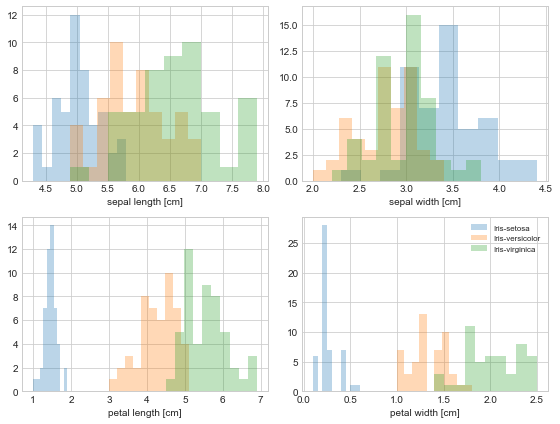

In [7]:
plot_histogram(X, y)

### Standardizing Feature Matrix

In [8]:
# standardize X
def standardize(X):
    X_standardized = StandardScaler().fit_transform(X)
    return X_standardized

In [9]:
X_standardized = standardize(X)

## Step 1: Eigendecomposition
The eigenvectors and eigenvalues of a covariance/correlation matrix represent the "core" of a PCA: the eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

### Covariance Matrix

In [10]:
# calculate covariance matrix
def calculate_covariance_matrix(X_standardized):
    covariance_matrix = np.cov(X_standardized.T)
    return covariance_matrix

In [11]:
covariance_matrix = calculate_covariance_matrix(X_standardized)
print('NumPy covariance matrix: \n%s' % covariance_matrix)

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### Correlation Matrix

In [12]:
# calculate correlation matrix
def calculate_correlation_matrix(X_standardized):
    correlation_matrix = np.corrcoef(X_standardized.T)
    return correlation_matrix

In [13]:
correlation_matrix = calculate_correlation_matrix(X_standardized)
print('NumPy correlation matrix \n%s' % correlation_matrix)

NumPy correlation matrix 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


### Calculating Eigenvalues & Eigenvectors

In [14]:
# perform eigen decomposition
def eigen_decomposition(X_standardized, method='covariance'):
    if method == 'covariance':
        matrix = calculate_covariance_matrix(X_standardized=X_standardized)
    elif method == 'correlation':
        matrix = calculate_correlation_matrix(X_standardized=X_standardized)
    else:
        matrix = None
    eigen_values, eigen_vectors = np.linalg.eig(matrix)
    return eigen_values, eigen_vectors

#### Eigendecomposition with Covariance Matrix

In [15]:
eigen_values, eigen_vectors = eigen_decomposition(X_standardized, method='covariance')
print('Eigenvalues with covariance matrix: \n%s' % eigen_values)
print('Eigenvectors with covariance matrix: \n%s' % eigen_vectors)

Eigenvalues with covariance matrix: 
[ 2.93035378  0.92740362  0.14834223  0.02074601]
Eigenvectors with covariance matrix: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


#### Eigendecomposition with Correlation Matrix

In [16]:
eigen_values, eigen_vectors = eigen_decomposition(X_standardized, method='correlation')
print('Eigenvalues with correlation matrix: \n%s' % eigen_values)
print('Eigenvectors with correlation matrix: \n%s' % eigen_vectors)

Eigenvalues with correlation matrix: 
[ 2.91081808  0.92122093  0.14735328  0.02060771]
Eigenvectors with correlation matrix: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Singular Vector Decomposition

In [17]:
# perform singular vector decomposition
def singular_vector_decomposition(X_standardized):
    u, s, v = np.linalg.svd(X_standardized.T)
    return u, s, v

In [18]:
u, s, v = singular_vector_decomposition(X_standardized)
print("Eigenvectors with SVD: \n%s" % u)

Eigenvectors with SVD: 
[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


## Step 2: Selecting Principal Components

### Sorting Eigen Pairs

In [19]:
# sort eigen pairs
def sort_eigen_pairs(eigen_values, eigen_vectors):

    # make a list of (eigen value, eigen vector) tuples
    eigen_pairs = list()
    for i in range(len(eigen_values)):
        eigen_pairs.append([np.abs(eigen_values[i]), eigen_vectors[:, i]])

    # sort the (eigen value, eigen vector) tuples in descending order
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)

    return eigen_pairs

In [20]:
eigen_pairs = sort_eigen_pairs(eigen_values, eigen_vectors)
# visually verify descending order
print("Eigen values in descending order:")
for i in range(len(eigen_values)):
    print(eigen_pairs[i][0])

Eigen values in descending order:
2.91081808375
0.921220930707
0.147353278305
0.0206077072356


### Explained Variance

In [21]:
# calculate explained variance
def calculate_explained_variance(eigen_values):
    
    total = sum(eigen_values)
    explained_variance = [(eigen_value / total)*100 for eigen_value in sorted(eigen_values, reverse=True)]
    cumulative_explained_variance = np.cumsum(explained_variance)
    
    return explained_variance, cumulative_explained_variance

In [22]:
# plot explained variance
def plot_explained_variance(explained_variance, cumulative_explained_variance):
    
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(6, 4))
        plt.bar(range(4), explained_variance, alpha=0.5, align='center', label='individual explained variance')
        plt.step(range(4), cumulative_explained_variance, where='mid', label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()

Individual explained variance: 
[72.770452093801367, 23.030523267680632, 3.6838319576273806, 0.51519268089062908]
Cumulative explained variance: 
[  72.77045209   95.80097536   99.48480732  100.        ]


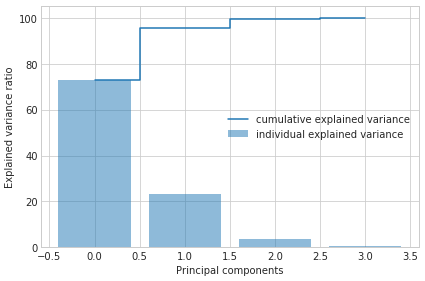

In [23]:
explained_variance, cumulative_explained_variance = calculate_explained_variance(eigen_values)
print('Individual explained variance: \n%s' % explained_variance)
print('Cumulative explained variance: \n%s' % cumulative_explained_variance)
plot_explained_variance(explained_variance, cumulative_explained_variance)

The plot above shows that the first principal component explains 72.77% of the variance, and that the second principal component explains 23.03% of the variance. Cumulatively, the first 2 principal components explain 95.8% of the variance. Therefore, we look into the first 2 principal components.

### Projection Matrix

In [24]:
def calculate_projection_matrix(eigen_pairs):
    projection_matrix = np.hstack((eigen_pairs[0][1].reshape(4,1), 
                                   eigen_pairs[1][1].reshape(4,1)))
    return projection_matrix

In [25]:
projection_matrix = calculate_projection_matrix(eigen_pairs)
print("Projection matrix: \n%s" % projection_matrix)

Projection matrix: 
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


## Step 3: Projection onto New Feature Subspace

In [26]:
def visualize_projection_matrix(projection_matrix):
    
    Y = X_standardized.dot(projection_matrix)
    
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(6, 4))
        for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                            ('blue', 'red', 'green')):
            plt.scatter(Y[y==lab, 0],
                        Y[y==lab, 1],
                        label=lab,
                        c=col)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='lower center')
        plt.tight_layout()

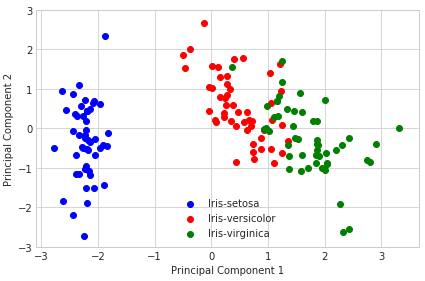

In [27]:
visualize_projection_matrix(projection_matrix)

## Shortcut: PCA with scikit-learn

In [28]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_PCA = sklearnPCA(n_components=2)
sklearn_Y = sklearn_PCA.fit_transform(X_standardized)

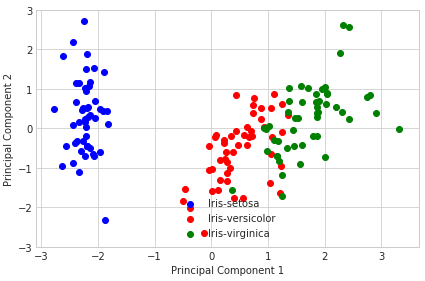

In [29]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(sklearn_Y[y==lab, 0],
                    sklearn_Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()